# Ensemble Learning

## Initial Imports

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split

In [120]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [50]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

## Split the Data into Training and Testing

In [43]:
# Create our features
X =df.copy()
X.drop("loan_status", axis=1, inplace=True)
X.head()
# Create our target
y = df["loan_status"]
y[:5]

0    low_risk
1    low_risk
2    low_risk
3    low_risk
4    low_risk
Name: loan_status, dtype: object

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   68817 non-null  float64
 1   int_rate                    68817 non-null  float64
 2   installment                 68817 non-null  float64
 3   home_ownership              68817 non-null  int64  
 4   annual_inc                  68817 non-null  float64
 5   verification_status         68817 non-null  object 
 6   issue_d                     68817 non-null  object 
 7   pymnt_plan                  68817 non-null  object 
 8   dti                         68817 non-null  float64
 9   delinq_2yrs                 68817 non-null  float64
 10  inq_last_6mths              68817 non-null  float64
 11  open_acc                    68817 non-null  float64
 12  pub_rec                     68817 non-null  float64
 13  revol_bal                   688

In [72]:
from sklearn.preprocessing import LabelEncoder
# Create the LabelEncoder instance
le = LabelEncoder()
# Fitting and encoding the columns with the LabelEncoder
# Folloiwing columns have type object (string)
cols = ['home_ownership', 'application_type', 'verification_status', 'issue_d', 'pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'next_pymnt_d', 'application_type', 'hardship_flag', 'debt_settlement_flag']

for c in cols: 
    le.fit(X[c])
    X[c] = le.transform(X[c])

X.verification_status.unique()
X.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,3,66000.0,1,2,0,27.24,0.0,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,0,0
1,25000.0,0.2000,929.09,1,105000.0,2,2,0,20.23,0.0,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,0,0
2,20000.0,0.2000,529.88,1,56000.0,2,2,0,24.26,0.0,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,0,0
3,10000.0,0.1640,353.55,3,92000.0,2,2,0,31.44,0.0,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,0,0
4,22000.0,0.1474,520.39,1,52000.0,0,2,0,18.76,0.0,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,0,0


In [80]:
# Check the balance of our target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [76]:
# Split the X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
Counter(y_train)

Counter({'low_risk': 51357, 'high_risk': 255})

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [77]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [79]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [105]:
# Resample the training data with the BalancedRandomForestClassifier
# Fit a Random Forest Classifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=1)
brf.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(n_estimators=1000, random_state=1)

In [114]:
# Calculated the balanced accuracy score
y_pred_brf = brf.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred_brf)


0.7416167851036206

In [107]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_brf)

array([[   53,    39],
       [ 1589, 15524]], dtype=int64)

In [132]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.58      0.91      0.06      0.72      0.51        92
   low_risk       1.00      0.91      0.58      0.95      0.72      0.54     17113

avg / total       0.99      0.91      0.58      0.95      0.72      0.54     17205



<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

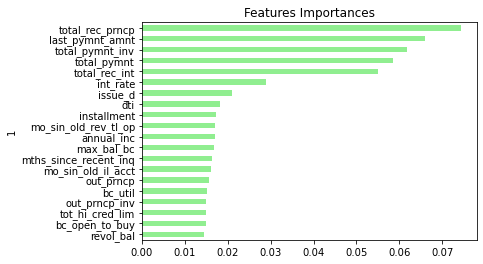

In [109]:
# List the features sorted in descending order by feature importance
importances = brf.feature_importances_

# sorted(zip(brf.feature_importances_, X.columns), reverse=True)

importances_df = pd.DataFrame(sorted(zip(brf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.tail(20).plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Easy Ensemble Classifier

In [134]:
# Train the Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Choose learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(
        n_estimators=1000,
        learning_rate=learning_rate,
        max_features=5,
        max_depth=3,
        random_state=1)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.999
Accuracy score (validation): 0.995

Learning rate:  0.1
Accuracy score (training): 0.526
Accuracy score (validation): 0.530

Learning rate:  0.25
Accuracy score (training): 0.598
Accuracy score (validation): 0.601

Learning rate:  0.5
Accuracy score (training): 0.985
Accuracy score (validation): 0.984

Learning rate:  0.75
Accuracy score (training): 0.994
Accuracy score (validation): 0.993

Learning rate:  1
Accuracy score (training): 0.843
Accuracy score (validation): 0.846



In [135]:
# Create GradientBoostingClassifier model
model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_features=5,
    max_depth=3,
    random_state=1)

# Fit the model
model.fit(X_train_scaled,y_train.ravel())

# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 0.999
Accuracy score (validation): 0.995


In [136]:
# Calculated the balanced accuracy score
y_pred_gb = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_gb)

0.9951758209822726

In [137]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
cm_df

,Predicted 0,Predicted 1
Actual 0,27,65
Actual 1,18,17095


In [142]:
# Print the classification report
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred_gb))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,27,65
Actual 1,18,17095


Accuracy Score : 0.995059575704737
Classification Report
              precision    recall  f1-score   support

   high_risk       0.60      0.29      0.39        92
    low_risk       1.00      1.00      1.00     17113

    accuracy                           1.00     17205
   macro avg       0.80      0.65      0.70     17205
weighted avg       0.99      1.00      0.99     17205



'                   pre       rec       spe        f1       geo       iba       sup\n\n  high_risk       0.60      0.29      1.00      0.39      0.54      0.27        92\n   low_risk       1.00      1.00      0.29      1.00      0.54      0.31     17113\n\navg / total       0.99      1.00      0.30      0.99      0.54      0.31     17205\n'

In [139]:
importances_rf = rf_model.feature_importances_


<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

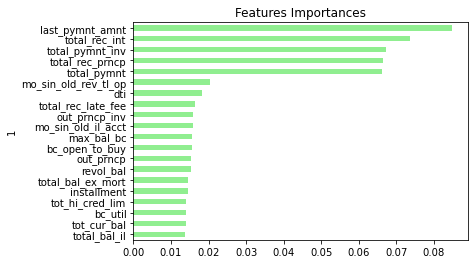

In [141]:
importances_gb_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_gb_df.set_index(importances_gb_df[1], inplace=True)
importances_gb_df.drop(columns=1, inplace=True)
importances_gb_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_gb_df = importances_gb_df.sort_values(by='Feature Importances')
importances_gb_df.tail(20).plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Final Questions

1. Which model had the best balanced accuracy score?

    Easy Ensamble GradientBoostingClassifier model showed the best accuracy score.

2. Which model had the best recall score?

    Easy Ensamble GradientBoostingClassifier model showed the best recall score.

3. Which model had the best geometric mean score?

    For GradientBoostingClassifier classification report does not show Geometric mean score for comparison.

4. What are the top three features?

    Top thrtee features ar 
    1. Last Payment Amount
    2. Total Received Interest
    3. Total Payment Inv